In [ ]:
# Code to ignore warnings

import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
warnings.filterwarnings("ignore")

In [ ]:
pip install catboost

In [ ]:
# Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as sp
from statistics import mode
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score,auc
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from imblearn.under_sampling import NearMiss
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Reading Data

In [ ]:
# Reading the data

data = pd.read_csv("/content/drive/MyDrive/AINE/Telecom Data.csv")

In [ ]:
# Printing the first 5 rows of the dataset

data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [ ]:
# Displaying the count and datatype of each column in the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [ ]:
data.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

## Data Cleaning

In [ ]:
# Finding number of customers with monthly revenue 0

len(data[data["MonthlyRevenue"] == 0])

6

In [ ]:
# Fidning number of columns have missing values more than 5%

data['missing_percentage'] = data[data.isnull().any(axis=1)].apply(lambda x : 100 - ((x.count()/58)*100),axis=1)
len(data[data['missing_percentage']>5])


159

In [ ]:
data.drop('missing_percentage',axis=1,inplace=True)

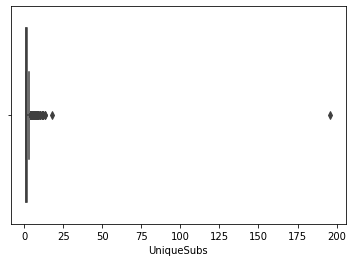

In [ ]:
# Plotting boxplot for the Unique Subscriptions column

sns.boxplot(x = data['UniqueSubs'])

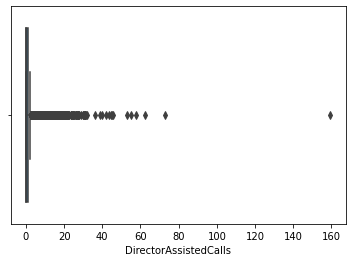

In [ ]:
# Plotting boxplot for the number of automated calls

sns.boxplot(x = data['DirectorAssistedCalls'])

In [ ]:
# Defining a function to drop outliers in the above mentioned 2 columns

def outlier(data):
    Q1 = data['UniqueSubs'].quantile(0.25)
    Q3 = data['UniqueSubs'].quantile(0.75)
    IQR = Q3-Q1
    data['UniqueSubs'] = data['UniqueSubs'][~((data['UniqueSubs'] < (Q1 - 1.5 * IQR)) |(data['UniqueSubs'] > (Q3 + 1.5 * IQR)))]
    Q1 = data['DirectorAssistedCalls'].quantile(0.25)
    Q3 = data['DirectorAssistedCalls'].quantile(0.75)
    IQR = Q3-Q1
    data['DirectorAssistedCalls'] = data['DirectorAssistedCalls'][~((data['DirectorAssistedCalls'] < (Q1 - 1.5 * IQR)) |(data['DirectorAssistedCalls'] > (Q3 + 1.5 * IQR)))]

In [ ]:
# Defining a function to do missing value imputation in the columns

def null(data):
    data['MonthlyRevenue'].fillna(value = int(data['MonthlyRevenue'].mean()),inplace=True)
    data['MonthlyMinutes'].fillna(value = data['MonthlyMinutes'].mean(),inplace=True)
    data['TotalRecurringCharge'].fillna(value = data['TotalRecurringCharge'].mean(),inplace=True)
    data['DirectorAssistedCalls'].fillna(value = data['DirectorAssistedCalls'].mean(),inplace=True)
    data['OverageMinutes'].fillna(value = data['OverageMinutes'].mean(),inplace=True)
    data['RoamingCalls'].fillna(value = data['RoamingCalls'].mean(),inplace=True)
    data['PercChangeRevenues'].fillna(value = data['PercChangeRevenues'].mean(),inplace=True)
    data['PercChangeMinutes'].fillna(value = data['PercChangeMinutes'].mean(),inplace=True)
    data['ServiceArea'].fillna(value = " ",inplace=True)
    data['AgeHH2'].fillna(value = mode(data['AgeHH2']),inplace=True)
    data['AgeHH1'].fillna(value = mode(data['AgeHH1']),inplace=True)
    data['CurrentEquipmentDays'].fillna(value = mode(data['CurrentEquipmentDays']),inplace=True)
    data['HandsetModels'].fillna(value = mode(data['HandsetModels']),inplace=True)
    data['Handsets'].fillna(value = mode(data['Handsets']),inplace=True)
    data["UniqueSubs"].fillna(value = mode(data["UniqueSubs"]),inplace=True)
    data.replace("Yes",int(1),inplace=True)
    data.replace("No",int(0),inplace=True)
    data.replace("Known",inplace=True)
    data.replace("Unknown",inplace=True)
    data['MaritalStatus'] = data['MaritalStatus'].astype(int)
    data['HandsetPrice'] = data['HandsetPrice'].astype(int)

In [ ]:
# Dropping columns that don't affect churn

def drop(data):
    data.drop(['Homeownership','ServiceArea','RVOwner','TruckOwner',"CustomerID"],axis=1,inplace=True)

In [ ]:
# Function to convert the credit rating column to float datatype

def credit(data):
    for i in range(len(data['CreditRating'])):
        data['CreditRating'][i] = re.sub('[^0-9]'," ",data['CreditRating'][i])
    data['CreditRating'] = data['CreditRating'].astype(float)
    data = pd.get_dummies(data,drop_first=True)
    return data

In [ ]:
outlier(data)
null(data)
drop(data)
data = credit(data)

## Exploratory Analysis

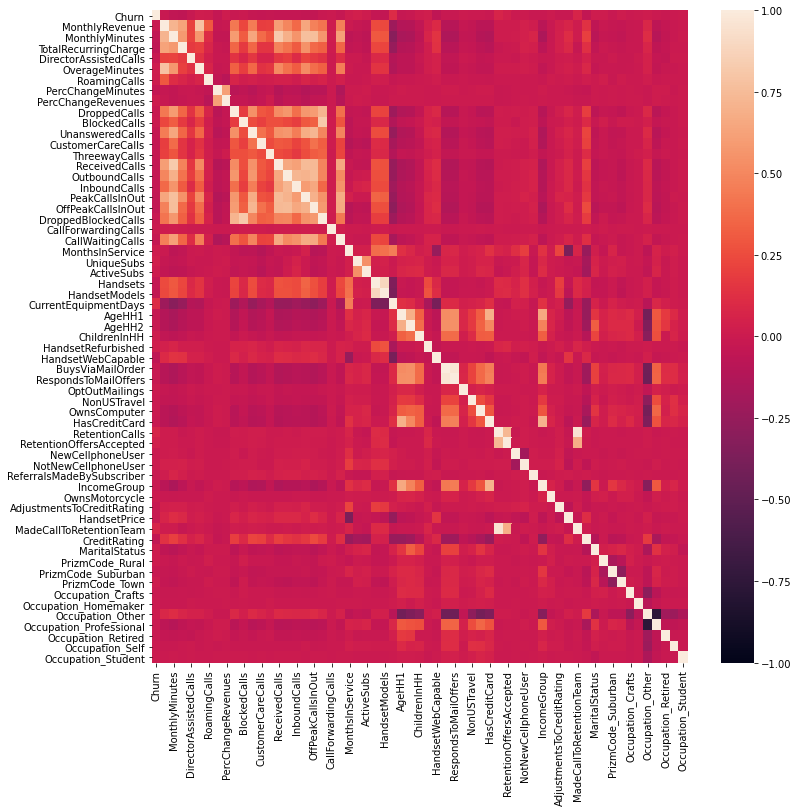

In [ ]:
# Plotting heatmap to study the correlation among all the columns

plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),vmin=-1, vmax=1) 

0.7878338898384089

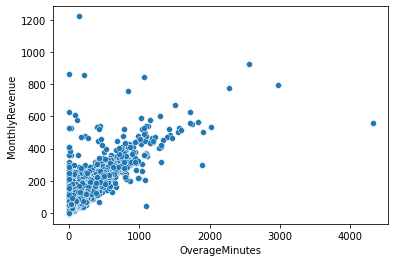

In [ ]:
# Plotting scatter plot between monthly minutes and overage minutes

sns.scatterplot(data['OverageMinutes'],data['MonthlyRevenue'])
sp.pearsonr(data['OverageMinutes'],data['MonthlyRevenue'])[0]

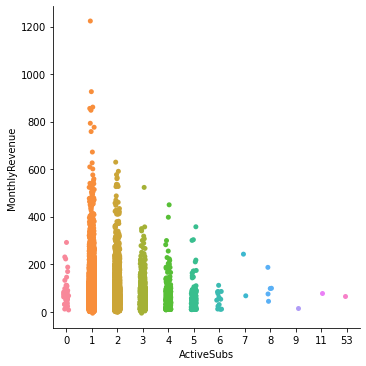

In [ ]:
# Plotting a categorical plot between monthly revenue and number of active subscriptions

sns.catplot(x = 'ActiveSubs',y = 'MonthlyRevenue',data = data)

No handles with labels found to put in legend.


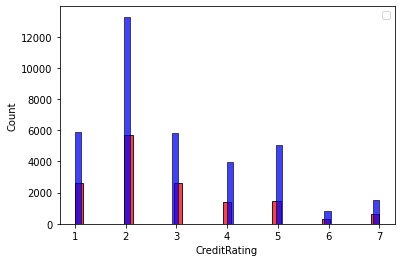

In [ ]:
# Plotting a bargraph to see hoe credit rating affects churn rate

yes = data.loc[data['Churn']==1, "CreditRating"]
no =  data.loc[data['Churn']==0, "CreditRating"]

sns.histplot(yes,legend="Churn = yes",color="r")
sns.histplot(no,legend = "Churn = no",color = "b")

plt.legend()
plt.show()

## Feature Engineering

In [ ]:
# Defining a function to create 2 extra features

def feature(data):
    data['Active_Over_Total'] = data['ActiveSubs']/data['UniqueSubs']*100
    data['Overage_Over_Monthly'] = data['OverageMinutes']/data['MonthlyMinutes']*100
    data['Overage_Over_Monthly'].fillna(0,inplace=True)

In [ ]:
feature(data) 

## Checking for Multicollinearity

In [ ]:
# Calculating variance inflation factor to reduce multicollinearity

vif_data = pd.DataFrame()
vif_data["feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]

In [ ]:
# Dropping those columns with VIF greater than 10

data.drop(vif_data[vif_data['VIF']>10]['feature'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      51047 non-null  int64  
 1   DirectorAssistedCalls      51047 non-null  float64
 2   OverageMinutes             51047 non-null  float64
 3   RoamingCalls               51047 non-null  float64
 4   PercChangeMinutes          51047 non-null  float64
 5   PercChangeRevenues         51047 non-null  float64
 6   UnansweredCalls            51047 non-null  float64
 7   CustomerCareCalls          51047 non-null  float64
 8   ThreewayCalls              51047 non-null  float64
 9   ReceivedCalls              51047 non-null  float64
 10  OutboundCalls              51047 non-null  float64
 11  InboundCalls               51047 non-null  float64
 12  PeakCallsInOut             51047 non-null  float64
 13  OffPeakCallsInOut          51047 non-null  flo

## Prediction

In [ ]:
X = data.drop("Churn",axis=1)
Y = data['Churn']

In [ ]:
#Performing undersampling since the dataset is unbalanced.

undersample = NearMiss(version=1)
X, Y = undersample.fit_resample(X, Y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

In [ ]:
# Standardizing the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
pred_log = model_log.predict(X_test)
print(accuracy_score(y_test,pred_log),'\n',f1_score(y_test,pred_log),'\n',precision_score(y_test,pred_log),'\n',recall_score(y_test,pred_log)) 

0.7211554800339847 
 0.6803039158386908 
 0.8109614491407339 
 0.5859060402684564


In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train) 
pred_rf = model_rf.predict(X_test)
print(accuracy_score(y_test,pred_rf),'\n',f1_score(y_test,pred_rf),'\n',precision_score(y_test,pred_rf),'\n',recall_score(y_test,pred_rf))

0.7408666100254885 
 0.7065614777756397 
 0.8281461434370772 
 0.6161073825503356


In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)
pred_xgb = model_xgb.predict(X_test)
print(accuracy_score(y_test,pred_xgb),'\n',f1_score(y_test,pred_xgb),'\n',precision_score(y_test,pred_xgb),'\n',recall_score(y_test,pred_xgb))

0.7401869158878505 
 0.6872571077930048 
 0.8800419067574646 
 0.5637583892617449


In [ ]:
model_cat = CatBoostClassifier(silent=True)
model_cat.fit(X_train,y_train)
pred_cat = model_cat.predict(X_test)
print(accuracy_score(y_test,pred_cat),'\n',f1_score(y_test,pred_cat),'\n',precision_score(y_test,pred_cat),'\n',recall_score(y_test,pred_cat))

0.7491928632115548 
 0.7147274835717047 
 0.8427529626253418 
 0.6204697986577181


## Evaluating on Test data

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/AINE/Telecom - Prediction Data.csv")

In [ ]:
test.drop('Churn',axis=1,inplace=True)

In [ ]:
outlier(test)
null(test)
drop(test)
test = credit(test)
feature(test) 
test.drop(vif_data[vif_data['VIF']>10]['feature'],axis=1,inplace=True)

In [ ]:
test = scaler.transform(test)

In [ ]:
pred = model_cat.predict(test)